# Lecture 4: Initial Value Problems (IVPs)

## Summary
- Solving IVPs using numerical integration methods
- Euler's methods
    - Modified and Implicit Euler methods
        - Euler and Implicit Euler's methods as the lower order $O(h)$ methods
        - Implicit Euler's method $O(h)$ as unconditionally stable
        - Modified Euler's methods as the higher order method $O(h^2)$

### Applications
An example of an IVP is coffeine absorption throughout the body. The process involves a complex interplay between organs but the process can still be described by a differential equation as proposed by Newton et al.

$$
\frac{dc(t)}{dt} = \kappa c(t),\quad c(t_0) = c_0
$$


This phenomenological model (which belongs to the category of models
entitled first-order pharmacokinetics) does not describe the entire process of caffeine elimination in detail, but captures the overall behaviour.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [3]:
# create font
font = {'family':'monospace', 'color':'black', 'size':13} # set font dictionary

# format graphs
plt.rcParams.update({
                    "legend.facecolor" : 'white',
                    "font.family" : "DejaVu Sans",
                    "xtick.bottom" : True,
                    "ytick.left" : True,
                    "legend.edgecolor" : 'black',
                    "legend.fancybox" : False,
                    'axes.facecolor' : 'white',
                    'legend.edgecolor' : 'black',
                    'xtick.labelsize' : 11,
                    'ytick.labelsize' : 11,
                    'axes.labelsize' : 13,
                    'axes.grid' : False,
                    'axes.edgecolor' : 'black',
                    'axes.linewidth': 1
                     })

Euler's method as the simplest numerical solution to an IVP.

Text(0, 0.5, '$c(t)$')

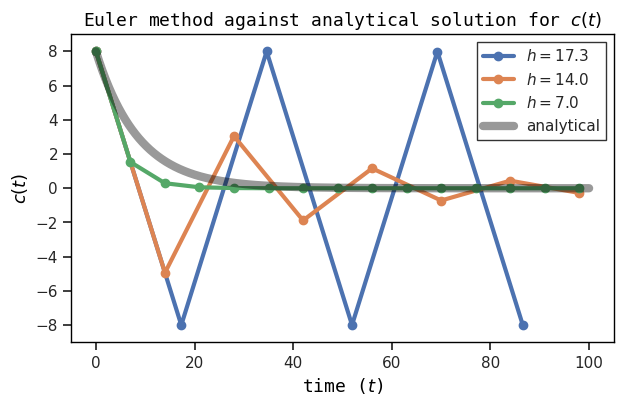

In [4]:
# create euler function
def exp_euler(t, f, y0):
    y = np.zeros(len(t))
    y[0] = y0
    h = t[1] - t[0]
    
    for i in range(0, len(t)-1):
        y[i+1] = y[i] + h * f(t[i], y[i])
    return y

kappa = np.log(2) / 6

# set variables
y0, ti, tf = 8, 0, 100 # intial condition
h_test = np.array((7, 14, 17.31)) # step sizes to test 

# create differential equation
def func(t, y): 
 return -kappa * y

# create analytical solution function
def an_euler(t, y0):
 # integral of differential equation
 return y0 * np.exp(-kappa * t)

# find numerical solution
plt.figure(figsize=(7,4))

for h in h_test[::-1]:
    t = np.arange(ti, tf, h) # time support vector
    yn_e = exp_euler(t, func, y0)
    plt.plot(t, yn_e, 'o-', lw=3, ms=6, label='$h=${}'.format(round(h,1)))

# find analytical solution
ta = np.arange(ti, tf, 0.0001) # time support vector

# plot graph
plt.plot(ta, an_euler(ta,y0), 'black', label='analytical', linewidth=6, alpha=.4) 

# format graph
plt.title('Euler method against analytical solution for $c(t)$', fontdict=font)
plt.legend(loc='best')
plt.ylim(-9,9)
plt.xlabel('time ($t$)', fontdict=font); plt.ylabel('$c(t)$', fontdict=font)

We can see from the above that the approximation gets more accurate with smaller step size ($h$) or a greater number of points. We can compute the errors in the solutions for each step size.

Text(0.5, 1.0, 'Error of numerical approximations to $c(0)e^{-kt}$')

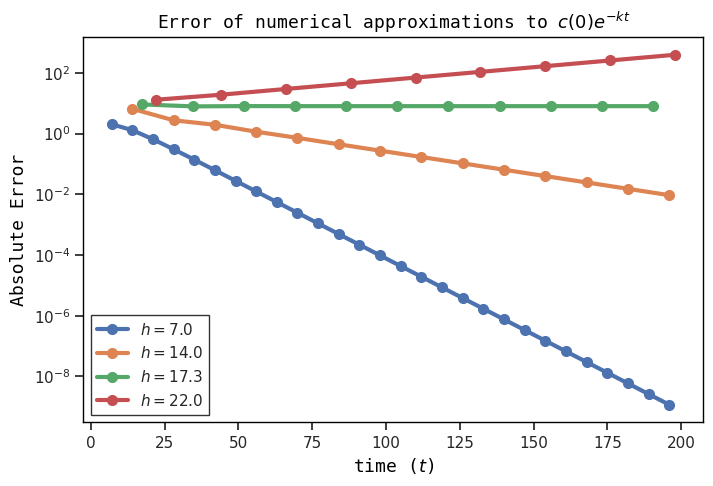

In [13]:
# create function for error of euler's method
max = 1000
tf = 200 # max simulation time (t)

# create step sizes (h)
h_test = np.array((7, 14, 17.31, 22))

# plot graph
plt.figure(figsize=(8,5))

for h in h_test:
    t = np.arange(ti, tf, h)
    yn_e = exp_euler(t, func, y0)
    error = abs(yn_e - an_euler(t, y0))
    plt.semilogy(t[1::], error[1::], 'o-', ms=7, lw=3, label='$h=${}'.format(round(h,1)))

# format graph
plt.legend(loc='best')
plt.xlabel('time ($t$)', fontdict=font)
plt.ylabel('Absolute Error', fontdict=font)
plt.title('Error of numerical approximations to $c(0)e^{-kt}$', fontdict=font)

We can see that error decreases with step size up until $h= 17.3$, at this point the error remains constant. However, at larger step sizes $h=22$ the error increases with time ($t$). This dependency on $h$ by the Euler method used here is called its conditional stability.

In [11]:
import scipy.optimize as spo

def im_euler(t, f, y0):
    y = np.zeros(len(t))
    y[0] = y0
    h = t[1] - t[0]
    
    for i in range(0, len(t)-1):
        print(i)
        ftm = lambda x : y[i] + h * f(t[i+1], x) - x
        y[i+1] = spo.root(ftm, 0).x
    return y

Implicit Euler's method as using the right hand side data point to determine the area. This can be implemented.

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
0
1
2
3
4
5
6
7
8
9
10
11
12
13
0
1
2
3
4
5
6
7
8
9
10
0
1
2
3
4
5
6
7
8
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
0
1
2
3
4
5
6
7
8
9
10
11
12
13
0
1
2
3
4
5
6
7
8
9
10
0
1
2
3
4
5
6
7
8


C:\Users\Tricia\AppData\Local\Temp\ipykernel_17984\1175421714.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y[i+1] = spo.root(ftm, 0).x


Text(0, 0.5, 'Absolute Error')

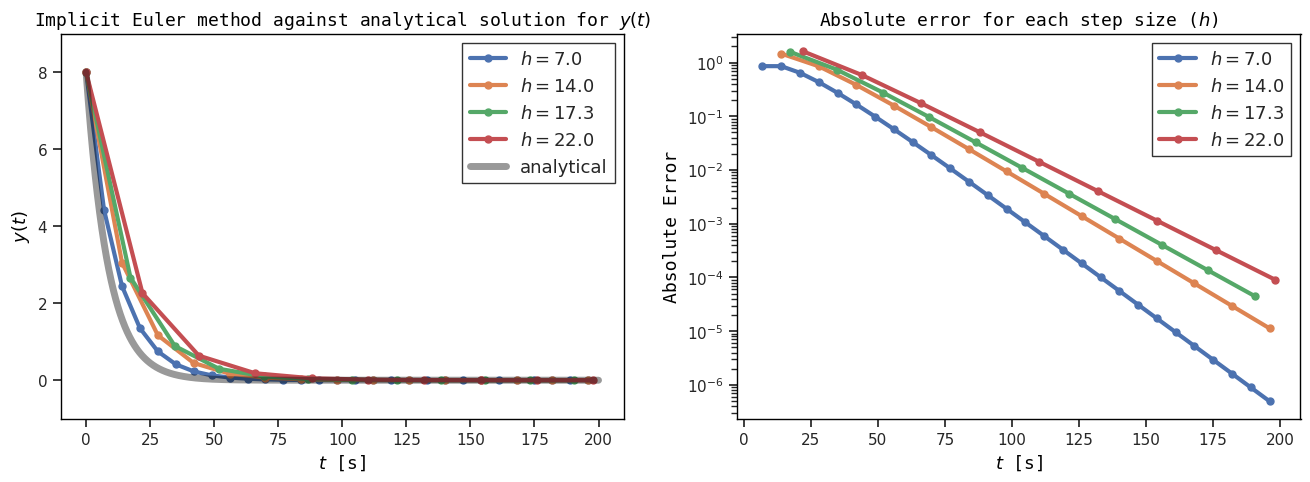

In [14]:
plt.figure(figsize=(16,5))

# find numerical solution
plt.subplot(1, 2, 1)

for h in h_test:
    # use implicit euler method
    t = np.arange(ti, tf, h)
    h = t[1] - t[0]
    yn_e = im_euler(t, func, y0)
    plt.plot(t, yn_e, '.-', label='$h=${}'.format(round(h,1)), ms=10, lw=3)

ta = np.arange(ti, tf, 0.01)

# plot graph
plt.plot(ta, an_euler(ta, y0), 'black', label='analytical', lw=5, alpha=.4)

# format graph
plt.title('Implicit Euler method against analytical solution for $y(t)$', fontdict=font)
plt.ylim(-1,9)
plt.legend(fontsize=13, loc='best')
plt.xlabel('$t$ [s]', fontdict=font)
plt.ylabel('$y(t)$', fontdict=font)

# Calculate and plot errors 
plt.subplot(1, 2, 2)

# find error for each step size (h)
for h in h_test:
    # use implicit euler method
    t = np.arange(ti, tf, h)
    yn_e = im_euler(t, func, y0)
    ya = an_euler(t, y0)
    Error = np.abs(yn_e-ya)
    plt.semilogy(t[1::], Error[1::], '.-', label='$h=${}'.format(round(h,1)), lw=3, ms=10)

# format graph
plt.title('Absolute error for each step size ($h$)', fontdict=font)
plt.legend(fontsize=13, loc='best')
plt.xlabel('$t$ [s]', fontdict=font)
plt.ylabel('Absolute Error', fontdict=font)

Modified Euler's method as higher order technique by upgrading to trapezoidal technique.

In [15]:
# create function for modified euler's method
def mod_euler(t, f, y0):
    y = np.zeros(len(t))
    y[0] = y0 # set initial value
    h = t[1] - t[0]
    
    for i in range(0, len(t)-1):
        y_ex = y[i] + h * f(t[i], y[i])
        y[i+1] = y[i] + (h / 2) * (f(t[i], y[i]) + f(t[i] + h, y_ex))
    return y

Let's compare the explicit euler's method and the modified euler's method.

In [16]:
# set variables
tf = 8 # max time (t)
n_test = 1000 # number of intervals

exp_err = np.zeros(n_test) # error for explicit euler 
mod_err = np.zeros(n_test) # error for modified euler

# find euler method solutions
for n in range(2, n_test):
    t = np.linspace(ti, tf, n+1)

    y_exp = exp_euler(t, func, y0) # explicit euler's method on y[n+1]
    exp_err[n] = abs(y_exp[-1] - an_euler(t[-1], y0))

    y_mod = mod_euler(t, func, y0) # modified euler's method on y[n+1]
    mod_err[n] = abs(y_mod[-1] - an_euler(t[-1], y0))

Text(0.5, 0, 'Number of steps ($n$)')

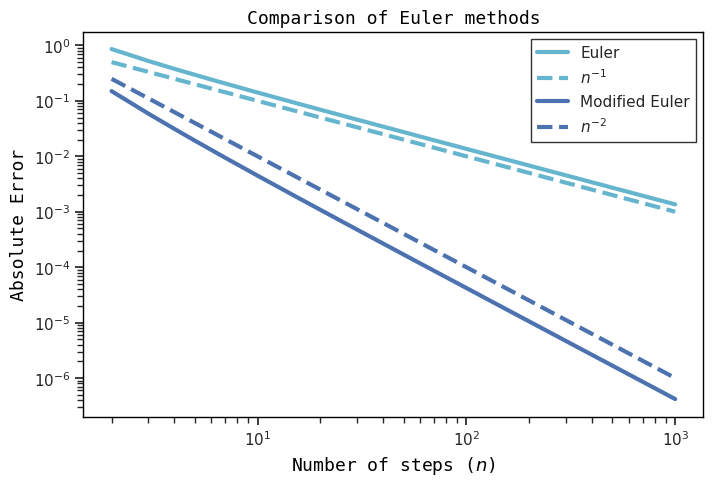

In [17]:
nt = np.arange(2, n_test)

# plot graphs
plt.figure(figsize=(8, 5))

plt.loglog(nt, exp_err[2::], 'c-', label='Euler', lw=3)
plt.loglog(nt, 1/nt, 'c--', label='$n^{-1}$', lw=3)

plt.loglog(nt, mod_err[2::], 'b-', label='Modified Euler', lw=3)
plt.loglog(nt, 1/nt**2, 'b--', label='$n^{-2}$', lw=3)

# format graph
plt.title('Comparison of Euler methods', fontdict=font)
plt.legend(loc='best')
plt.ylabel('Absolute Error', fontdict=font)
plt.xlabel('Number of steps ($n$)', fontdict=font)